In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import math
import researchpy as rp
import seaborn as sns

In [2]:
filename = 'final final finfal - Sheet1.csv'
df = pd.read_csv(filename)

# Cleaning and Processing

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Leg Number'] = df['Leg Number'].astype(str)
df['Date'] = df['Date'].astype(str)
df['Throw 1'] = df['Throw 1'].astype(str)
df['Throw 2'] = df['Throw 2'].astype(str)
df['Throw 3'] = df['Throw 3'].astype(str)

df = df.assign(legID=(df['Date'] + '_' + df['Leg Number']).astype('category').cat.codes)
df['Date'] = pd.to_datetime(df['Date'])
df['Leg Number'] = df['Leg Number'].astype(int)

In [4]:
df['Player Name'] = df['Player Name'].str.strip()
df['Opponent Name'] = df['Opponent Name'].str.strip()
df['Throw 1'] = df['Throw 1'].str.strip()
df['Throw 2'] = df['Throw 2'].str.strip()
df['Throw 3'] = df['Throw 3'].str.strip()
df['Throw 1'] = df['Throw 1'].replace("B25","SB25")
df['Throw 1'] = df['Throw 1'].replace('DB25','SB25')
df['Throw 1'] = df['Throw 1'].replace('B50','DB50')
df['Throw 2'] = df['Throw 2'].replace('B25','SB25')
df['Throw 2'] = df['Throw 2'].replace('DB25','SB25')
df['Throw 2'] = df['Throw 2'].replace('B50','DB50')
df['Throw 3'] = df['Throw 3'].replace('B25','SB25')
df['Throw 3'] = df['Throw 3'].replace('DB25','SB25')
df['Throw 3'] = df['Throw 3'].replace('B50','DB50')

# df['Opponent Name'] = df['Opponent Name'].str.replace(' ', '')

In [5]:
df = df.drop(['Lean'], axis=1)

In [6]:
df['Throw 1'].unique()

array(['T20', '20', '18', '1', '19', 'D20', 'T18', 'SB25', 'D8', '5',
       'T1', '0', 'D10', 'T19', 'DB50', 'T5', 'T12', 'D18', 'T7', '14',
       'D12', '8', 'T4', '9', '16', 'T3', '3', 'D14', '6', '50', 'D7',
       'nan', '10', '12', '17', 'T10', '2', 'T9'], dtype=object)

In [7]:
throws = df[["Throw 1", "Throw 2", "Throw 3"]]
numDarts = []
for a, b, c in throws.itertuples(index=False):
    count=0
    if a != 'nan':
        count+=1
    if b != 'nan':
        count+=1
    if c!= 'nan':
        count+=1
    numDarts.append(count)
df['Darts per Turn'] = numDarts

In [8]:
could_checkout = []
for a in df["Points Left"]:
    if a<=170 and a>169 or a <160:
        could_checkout.append(1)
    else:
        could_checkout.append(0)

df["Checkout Opportunity"] = could_checkout    

In [9]:
ppt = df[["First Throw", "legID", "Total Points Per Turn", "Points Left"]]
turn_diff = []
keep = 501
leg_id = 21
for a, b, c, d in ppt.itertuples(index=False):
    if b != leg_id:
        leg_id = b
        keep = 0
        keep = d
        turn_diff.append(c)
    else:
        turn_diff.append(keep - d)
        keep = d
df['Point Diff'] = turn_diff

In [10]:
summary_df = df[['Darts per Turn','Total Points Per Turn','Point Diff', 'Checkout Opportunity', 'Time per Turn', 'Turn Number', 'Points Left', 'Checkout Turn', 'First Throw']]
summary_df.describe()

,Darts per Turn,Total Points Per Turn,Point Diff,Checkout Opportunity,Time per Turn,Turn Number,Points Left,Checkout Turn,First Throw
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,2.891258,92.797441,50.200426,0.432836,8.429616,3.076759,197.970149,0.100213,0.100213
std,0.422281,43.445510,90.059657,0.495998,2.950871,1.549219,142.930244,0.300605,0.300605
min,0.000000,0.000000,-205.000000,0.000000,1.580000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,59.000000,-6.000000,0.000000,6.430000,2.000000,56.000000,0.000000,0.000000
50%,3.000000,96.000000,51.000000,0.000000,7.880000,3.000000,201.000000,0.000000,0.000000
75%,3.000000,135.000000,119.000000,1.000000,10.230000,4.000000,321.000000,0.000000,0.000000
max,3.000000,180.000000,272.000000,1.000000,25.910000,7.000000,492.000000,1.000000,1.000000


In [11]:
df.to_csv("PR1_Data.csv")

In [12]:
filename = 'PR1_Data.csv'
df = pd.read_csv(filename)

In [13]:
df_sum = df.groupby(['legID', 'Player Name','Opponent Name']).sum().reset_index()
df_count = df.groupby(['legID', 'Player Name','Opponent Name']).count().reset_index()

In [14]:
df_sum.columns

Index(['legID', 'Player Name', 'Opponent Name', 'Unnamed: 0', 'Player Height',
       'Leg Number', 'Turn Number', 'Total Points Per Turn', 'Points Left',
       'Leg won', 'Checkout Turn', 'Time per Turn', 'First Throw',
       'Darts per Turn', 'Checkout Opportunity', 'Point Diff'],
      dtype='object')

In [15]:
legid = df_sum['legID']
play_name = df_sum['Player Name']
opp_name= df_sum['Opponent Name']
three_dart_avg = [(501/ number)*3 for number in df_sum['Darts per Turn']]
first_throw = df_sum['First Throw']
total_points = df_sum['Total Points Per Turn']
num_turns = df_count['Turn Number']
win = df_sum['Leg won']
numThrows = df_sum['Darts per Turn']
total_time = df_sum['Time per Turn']

In [16]:
first_throw = [1 if firsts != 0 else 0 for firsts in first_throw]
win = [1 if wins != 0 else 0 for wins in win]

In [17]:
# Creating data frame of summarized leg information
leg_dict = {'LegID':legid,
            'Player Name': play_name,
            'Opponent Name': opp_name,
            'Number of Turns': num_turns,
            'Total Points': total_points,
            'First Throw': first_throw,
            'Win': win,
            'Three Dart Average': three_dart_avg,
            'Time': total_time}
leg_df = pd.DataFrame.from_dict(leg_dict) 

In [18]:
leg_df.to_csv("Leg_Data.csv")

## Analysis 

### Questions to Answer
* What is the correlation between throwing first and and winning the leg?
* Which variable is most helpful in predicting who will win the leg? 
* Does the amount of time in which the thrower takes to throw have an impact on their efficiency or contribute to winning?
* Can we lump playing styles together by their dart locations?

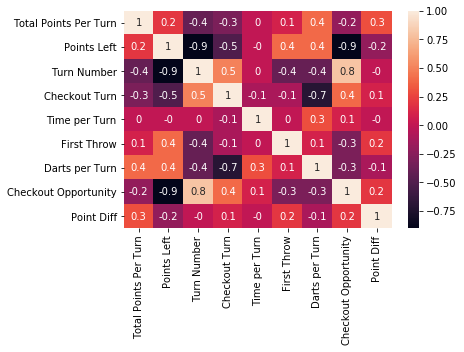

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt
small_df = df[["Total Points Per Turn","Points Left","Turn Number","Checkout Turn","Time per Turn", "First Throw", "Darts per Turn", "Checkout Opportunity", "Point Diff"]]

corrMatrix = small_df.corr().round(1)
sn.heatmap(corrMatrix, annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

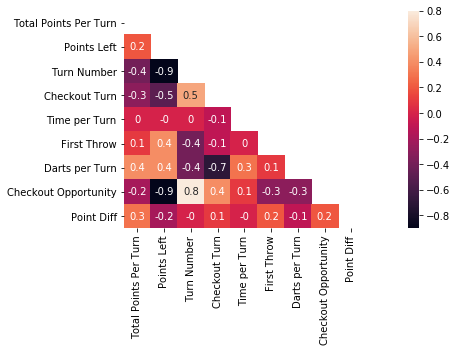

In [36]:
matrix = np.triu(small_df.corr())
sns.heatmap(small_df.corr().round(1), annot=True, mask=matrix)
plt.xlim(a,s)
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

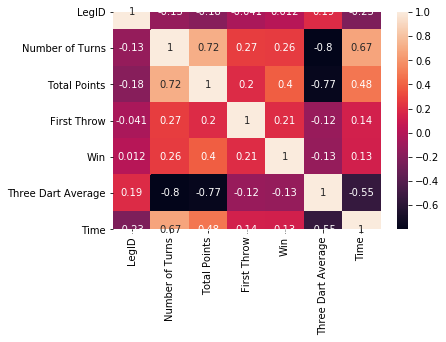

In [20]:
corrMatrix = leg_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

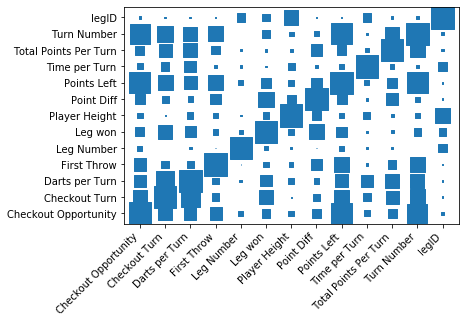

In [22]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

corr = df.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

In [24]:
# palette = sns.diverging_palette(20, 220, n=256)

In [25]:
df.describe()d

,Player Height,Leg Number,Turn Number,Total Points Per Turn,Points Left,Leg won,Checkout Turn,Time per Turn,First Throw,legID,Darts per Turn,Checkout Opportunity,Point Diff
count,231.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,71.721212,2.085288,3.076759,92.797441,197.970149,0.452026,0.100213,8.429616,0.100213,22.893390,2.891258,0.432836,50.200426
std,2.867532,0.882630,1.549219,43.445510,142.930244,0.498225,0.300605,2.950871,0.300605,13.354044,0.422281,0.495998,90.059657
min,68.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.580000,0.000000,0.000000,0.000000,0.000000,-205.000000
25%,70.000000,1.000000,2.000000,59.000000,56.000000,0.000000,0.000000,6.430000,0.000000,11.000000,3.000000,0.000000,-6.000000
50%,71.000000,2.000000,3.000000,96.000000,201.000000,0.000000,0.000000,7.880000,0.000000,23.000000,3.000000,0.000000,51.000000
75%,73.000000,3.000000,4.000000,135.000000,321.000000,1.000000,0.000000,10.230000,0.000000,35.000000,3.000000,1.000000,119.000000
max,80.000000,4.000000,7.000000,180.000000,492.000000,1.000000,1.000000,25.910000,1.000000,43.000000,3.000000,1.000000,272.000000


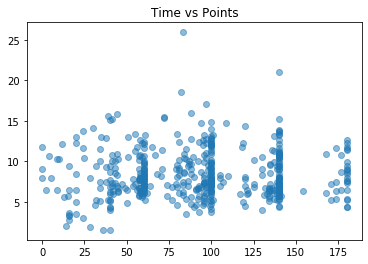

In [29]:
# Lets look at points per turn vs Time per turn 

x = df['Total Points Per Turn']
y = df['Time per Turn']
plt.scatter(x, y, alpha=0.5)
plt.title("Time vs Points")
plt.show()

In [30]:
leg_df.head()

,LegID,Player Name,Opponent Name,Number of Turns,Total Points,First Throw,Win,Three Dart Average,Time
0,0,Wade,Whitlock,7,501,1,1,79.105263,67.89
1,0,Whitlock,Wade,6,441,0,0,83.500000,73.40
2,1,Wade,Whitlock,5,501,0,1,100.200000,68.85
3,1,Whitlock,Wade,5,493,1,0,100.200000,44.01
4,2,Wade,Whitlock,5,445,1,0,100.200000,51.84


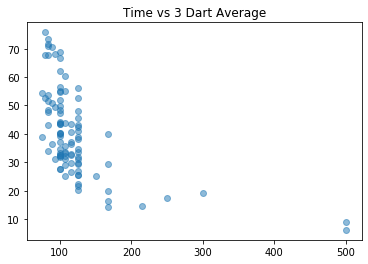

In [31]:
x = leg_df['Three Dart Average']
y = leg_df['Time']
plt.scatter(x, y, alpha=0.5)
plt.title("Time vs 3 Dart Average")
plt.show()

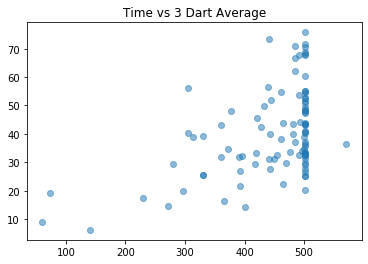

In [32]:
x = leg_df['Total Points']
y = leg_df['Time']
plt.scatter(x, y, alpha=0.5)
plt.title("Time vs 3 Dart Average")
plt.show()

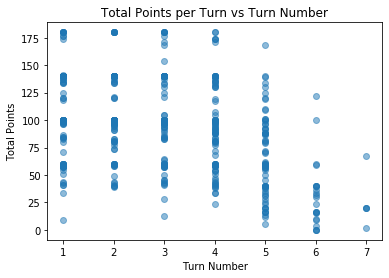

In [33]:
y = df['Total Points Per Turn']
x = df['Turn Number']
plt.scatter(x, y, alpha=0.5)
plt.title("Total Points per Turn vs Turn Number")
plt.xlabel("Turn Number")
plt.ylabel("Total Points")
plt.show()
#When are players getting to their first checkout opportunity? 
# There's a stiff decrease in points between turn 5 and turn 6. Why?

In [34]:
import scipy.stats as stats
tester = df.loc[(df['First Throw'] == 1)]


stats.f_oneway(df['Total Points Per Turn'][df['Checkout Opportunity'] == 1],
               df['Total Points Per Turn'][df['Checkout Opportunity'] == 0])

F_onewayResult(statistic=12.917452237170297, pvalue=0.00036013988174155346)

In [35]:
df.head()

,Player Name,Opponent Name,Date,Player Height,Leg Number,Turn Number,Throw 1,Throw 2,Throw 3,Total Points Per Turn,Points Left,Leg won,Checkout Turn,Time per Turn,Handedness,First Throw,legID,Darts per Turn,Checkout Opportunity,Point Diff
0,Gerwyn Price,Gary Anderson,2018-11-18,70.0,1,1,T20,20,20,100,401,1,0,7.81,Right,1,25,3,0,100
1,Gary Anderson,Gerwyn Price,2018-11-18,68.0,1,1,T20,T20,20,140,361,0,0,6.91,Right,0,25,3,0,40
2,Gerwyn Price,Gary Anderson,2018-11-18,70.0,1,2,T20,T20,19,139,262,1,0,9.41,Right,0,25,3,0,99
3,Gary Anderson,Gerwyn Price,2018-11-18,68.0,1,2,20,19,20,59,302,0,0,8.09,Right,0,25,3,0,-40
4,Gerwyn Price,Gary Anderson,2018-11-18,70.0,1,3,20,4,T20,84,178,1,0,8.62,Right,0,25,3,0,124


In [37]:
# distribution of checkout combinations
# Make a column for the difference in points between players 
# See if time means anything on the number of points made when a checkout is not possible 
    # Think when can we expect to see higher points
    # See if you can map non-checkout dart locations 

In [38]:
no_check = df.loc[(df['Checkout Opportunity']==0)]
no_check.head()

,Player Name,Opponent Name,Date,Player Height,Leg Number,Turn Number,Throw 1,Throw 2,Throw 3,Total Points Per Turn,Points Left,Leg won,Checkout Turn,Time per Turn,Handedness,First Throw,legID,Darts per Turn,Checkout Opportunity,Point Diff
0,Gerwyn Price,Gary Anderson,2018-11-18,70.0,1,1,T20,20,20,100,401,1,0,7.81,Right,1,25,3,0,100
1,Gary Anderson,Gerwyn Price,2018-11-18,68.0,1,1,T20,T20,20,140,361,0,0,6.91,Right,0,25,3,0,40
2,Gerwyn Price,Gary Anderson,2018-11-18,70.0,1,2,T20,T20,19,139,262,1,0,9.41,Right,0,25,3,0,99
3,Gary Anderson,Gerwyn Price,2018-11-18,68.0,1,2,20,19,20,59,302,0,0,8.09,Right,0,25,3,0,-40
4,Gerwyn Price,Gary Anderson,2018-11-18,70.0,1,3,20,4,T20,84,178,1,0,8.62,Right,0,25,3,0,124


In [39]:
df.loc[(df['Throw 1']=='nan')]

,Player Name,Opponent Name,Date,Player Height,Leg Number,Turn Number,Throw 1,Throw 2,Throw 3,Total Points Per Turn,Points Left,Leg won,Checkout Turn,Time per Turn,Handedness,First Throw,legID,Darts per Turn,Checkout Opportunity,Point Diff
341,John William Jones,Alan Soutar,2020-11-06,NaN,1,5,nan,15,D8,31,0,1,1,4.59,Right,0,34,2,1,25
352,Alan Soutar,John William Jones,2020-11-06,NaN,2,6,nan,nan,nan,0,40,0,0,9.08,Right,0,35,0,1,20
353,John William Jones,Alan Soutar,2020-11-06,NaN,2,6,nan,20,D20,60,0,1,1,7.79,Right,0,35,2,1,40


In [40]:
l1 = df["Throw 1"].unique().tolist()
l2 = df["Throw 2"].unique().tolist()
l3 = df["Throw 3"].unique().tolist()
# l1.append(l2)
# l1.append(l3)

In [42]:
img = plt.imread("dart_board.png")

In [43]:
# import matplotlib.pyplot as plt
# import numpy as np

# fig1 = plt.figure() # create a figure with the default size 

# im1 = np.random.rand(5,5)
# ax1 = fig1.add_subplot(2,2,1) 
# ax1.imshow(im1, interpolation='none')
# ax1.set_title('5 X 5')

# im2 = np.random.rand(100,100)
# ax2 = fig1.add_subplot(2,2,2)
# ax2.imshow(im2, interpolation='none')
# ax2.set_title('100 X 100')

# fig1.savefig('example.png', dpi = 1000) # change the resolution of the saved image

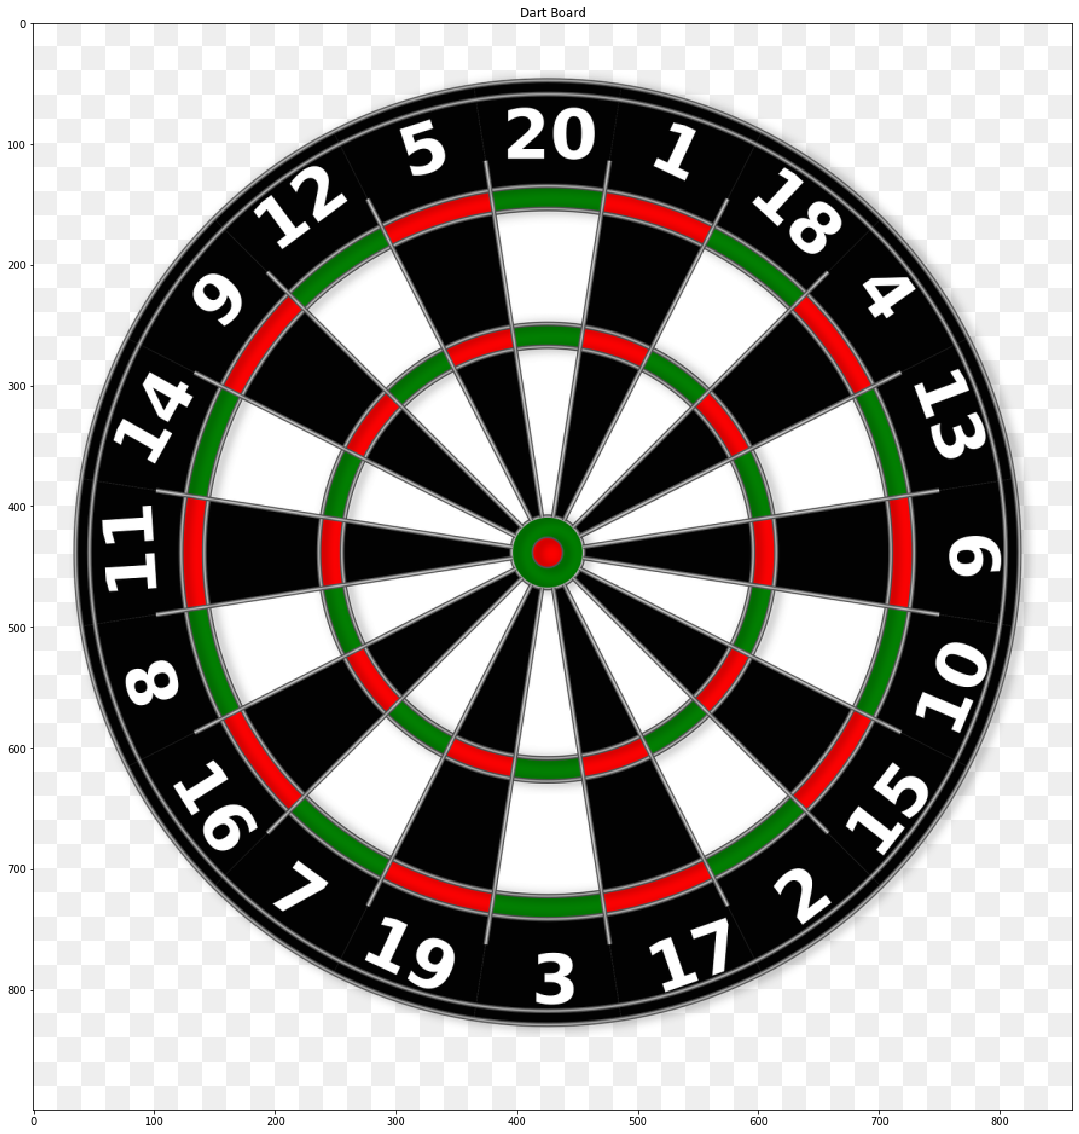

In [44]:
fig = plt.figure(figsize = (20,20)) # create a 5 x 5 figure 
ax1 = fig.add_subplot(111)
ax1.imshow(img, interpolation='none')
ax1.set_title('Dart Board')

plt.show()

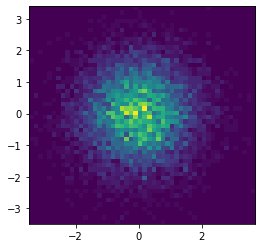

In [45]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

# Generate some test data
x = np.random.randn(8873)
y = np.random.randn(8873)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

In [46]:
x = np.append(['T20','20','18','1','19','D20','T18','B25','D8','5','T1','0','D10','T19','B50','T5','T12','D18','T7','14','D12','8','T4','9','16','T3','3','D14','6','50','D7','SB25','nan','DB25','10','12','17','T10','2','T9'],
              ['20','T20','19','4','18','T19','nan','5','16','T3','0','1','B25','T14','3','D14','D20','DB50','T1','T18','11','D10','17','12','D6','14','T5','D16','D2','T11','T7','D18','15','7','6','T17','B50','9'])
x = np.append(x,['20','19','T20','18','T18','D20','T19','nan','3','T5','1','10','T1','17','T17','D2','0','DB50','5','14','T3','16','13','D5','D4','4','SB25','D8','T15','D9','T4','D16','T7','7','T16','8','D12','D3','B25','9','B50','12','11','D15'])
np.unique(x)

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '2', '20', '3', '4', '5', '50', '6', '7', '8', '9', 'B25',
       'B50', 'D10', 'D12', 'D14', 'D15', 'D16', 'D18', 'D2', 'D20', 'D3',
       'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'DB25', 'DB50', 'SB25', 'T1',
       'T10', 'T11', 'T12', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19',
       'T20', 'T3', 'T4', 'T5', 'T7', 'T9', 'nan'], dtype='<U4')

In [38]:
location_dict = {'1':[11.5,14.8],'10':[15.6,8.6],'11':[4.8,10.2],
                 '12':[6.8,14.2],'13':[15.3,11.7],'14':[4.7,11.7],
                 '15':[14.35,7.28],'16':[5.17,7.25],'17':[11.57,5.29],
                 '18':[10,14.6],'19':[8,5.5],'2':[13.12,6.15],
                 '20':[10,15],'3':[9.76,5.05],'4':[14.52,13.48],
                 '5':[8.11,15.26],'50':[9.93,10.25],'6':[15.38,10.33],
                 '7':[6.67,6.05],'8':[4.52,8.62],'9':[5.23,13.59],
                 'B25':[9.6,10],'B50':[9.93,10.25],'D10':[16.37,8.27],
                 'D12':[5.71,15.40],'D14':[3.32,12.28], 'D15':[15.41,6.46], 
                 'D16':[4.31476,6.42909], 'D18':[13.9094,25.5782], 'D2':[13.8751,4,95562], 
                 'D20':[9.7974,16.8118], 'D3':[9.86593,3.7563],'D4':[15.4514,14.0705],
                 'D5':[7.74141,16.5034], 'D6':[16.7192,10.1641], 'D7':[5.685,5.09269],
                 'D8':[3.38956,8.27668], 'D9':[4.314,14.1391], 'DB25':[9.6,10],
                 'DB50':[9.93,10.25], 'SB25':[9.6,10], 'T1':[11.0653,14.0705],
                 'T10':[13.8408,8.99907], 'T11':[5.71968,10.1299], 'T12':[7.39874,13.488],
                 'T14':[5.89102,11.5348], 'T15':[13.2583,7.86828], 'T16':[6.47355,7.97108],
                 'T17':[11.2366,6.49762], 'T18':[12.2989,13.5565], 'T19':[8.63234,6.49762],
                 'T20':[10,14.2], 'T3':[9.9,6.3], 'T4':[13.2241,12.6313],
                 'T5':[8.59807,14.0363], 'T7':[7.43301,7.01162], 'T9':[6.54208,12.7341]}

In [24]:
location_dict['T20'][0]

10

In [48]:
check_opp = df.loc[(df['Checkout Opportunity']==1)]
cols = check_opp[["Throw 1", "Throw 2", "Throw 3"]]
x_coords = []
y_coords = []
for a, b, c in cols.itertuples(index=False):
    if a in location_dict:
        x_coords.append(location_dict[a][0])
        y_coords.append(location_dict[a][1])
    if b in location_dict:
        x_coords.append(location_dict[b][0])
        y_coords.append(location_dict[b][1])
    if c in location_dict:
        x_coords.append(location_dict[c][0])
        y_coords.append(location_dict[c][1])
data = {"x": x_coords,
       "y": y_coords}
    

<Figure size 1296x1296 with 0 Axes>

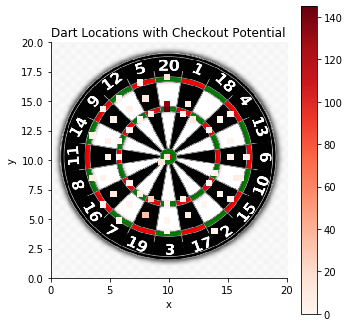

In [49]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg 
fig = plt.figure(figsize = (18,18))
map_img = mpimg.imread("dart_board_nobg.png")

# Custom it with the same argument as 1D density plot
# hmax = sns.histplot(data=data, x='x',y='y')
hmax = sns.displot(data=data, x='x', y='y',cmap='Reds', cbar=True, binwidth=(.45,.45))
# hmax = sns.kdeplot(x2_coords,y2_coords, cmap='Reds', shade=True, bw=.05, legend=True, cbar=True)
#hmax.collections[0].set_alpha(0)
plt.title("Dart Locations with Checkout Potential")
plt.imshow(map_img, zorder=0, extent=[0, 20, 0, 20])
plt.show()
plt.savefig('checkout_potential.png', dpi=1080)

In [50]:
check_opp = df.loc[(df['Checkout Opportunity']==0)]
cols = check_opp[["Throw 1", "Throw 2", "Throw 3"]]
x1_coords = []
y1_coords = []
for a, b, c in cols.itertuples(index=False):
    if a in location_dict:
        x1_coords.append(location_dict[a][0])
        y1_coords.append(location_dict[a][1])
    if b in location_dict:
        x1_coords.append(location_dict[b][0])
        y1_coords.append(location_dict[b][1])
    if c in location_dict:
        x1_coords.append(location_dict[c][0])
        y1_coords.append(location_dict[c][1])
        
data1 = {"x": x1_coords,
       "y": y1_coords}
    

<Figure size 1296x1296 with 0 Axes>

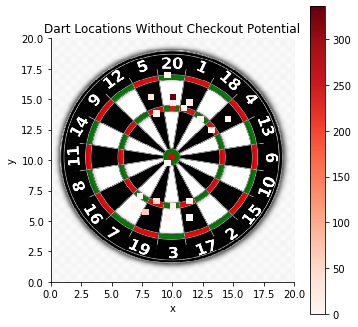

In [51]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg 
fig = plt.figure(figsize = (18,18))
map_img = mpimg.imread("dart_board_nobg.png")

# Custom it with the same argument as 1D density plot
# hmax = sns.histplot(data=data, x='x',y='y')
hmax = sns.displot(data=data1, x='x', y='y',cmap='Reds', cbar=True, binwidth=(.45,.45))
# hmax = sns.kdeplot(x2_coords,y2_coords, cmap='Reds', shade=True, bw=.05, legend=True, cbar=True)
# hmax.collections[0].set_alpha(0)
plt.title("Dart Locations Without Checkout Potential")
plt.imshow(map_img, zorder=0, extent=[0, 20, 0, 20])
plt.show()
plt.savefig('no_checkout_potential.png', dpi=1080)

In [52]:
check_opp = df.loc[(df['Checkout Turn']==1)]
cols = check_opp[["Throw 1", "Throw 2", "Throw 3"]]
x2_coords = []
y2_coords = []
for a, b, c in cols.itertuples(index=False):
    if a in location_dict:
        x2_coords.append(location_dict[a][0])
        y2_coords.append(location_dict[a][1])
    if b in location_dict:
        x2_coords.append(location_dict[b][0])
        y2_coords.append(location_dict[b][1])
    if c in location_dict:
        x2_coords.append(location_dict[c][0])
        y2_coords.append(location_dict[c][1])

data2 = {"x": x2_coords,
       "y": y2_coords}

<Figure size 1296x1296 with 0 Axes>

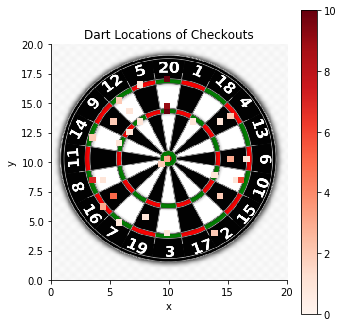

In [54]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg 
fig = plt.figure(figsize = (18,18))
map_img = mpimg.imread("dart_board_nobg.png")

# Custom it with the same argument as 1D density plot
# sns.histplot(data=data2, x='x',y='y')
hmax = sns.displot(data=data2, x='x', y='y',cmap='Reds', cbar=True, binwidth=(.45,.45))
# hmax = sns.kdeplot(x2_coords,y2_coords, cmap='Reds', shade=True, bw=.05, legend=True, cbar=True)
# hmax.collections[0].set_alpha(0)
plt.title("Dart Locations of Checkouts")
plt.imshow(map_img, zorder=0, extent=[0, 20, 0, 20])
plt.show()
plt.savefig('actual_checkouts.png', dpi=1080)

In [32]:
x = sns.displot(data=data, x='x', y='y')
plt.show()

In [17]:
sns.histplot(data=data2, x='x',y='y')
plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

In [35]:
cols = df[["Throw 1", "Throw 2", "Throw 3", "Checkout Opportunity"]]
x3_coords = []
y3_coords = []
checkout = []
for a, b, c,d in cols.itertuples(index=False):
    if a in location_dict:
        x3_coords.append(a)
        checkout.append(d)
    if b in location_dict:
        x3_coords.append(b)
        checkout.append(d)
    if c in location_dict:
        x3_coords.append(c)
        checkout.append(d)
        
all_throws = {"x": x3_coords,
       "check": checkout}

In [36]:
print(len(checkout))
print(len(x3_coords))

1316
1316


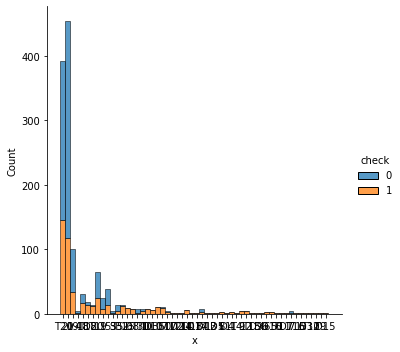

In [37]:
sns.displot(all_throws,x="x", hue="check", multiple="stack")

In [ ]:
leg_df.head(1)

In [ ]:
leg_df.describe()

In [ ]:
survey_responses = pd.Categorical(responses, categories=["happy", "content", "sad"], ordered=True)

In [ ]:
Throw3 = df['Opponent Name']
throw1_size = len(df['Opponent Name'])
survey_responses = pd.Categorical(Throw3, categories=['Gerwyn Price', 'Gary Anderson', 'Adrian Lewis', 'Phil Taylor',
       'Peter Wright', 'Michael van Gerwen', 'Nathan Aspinall',
       'Michael Smith', 'Damon Heta', 'Jonny Clayton',
       'Raymond van Barneveld', 'Joe Cullen', 'Brendan Dolan',
       'Mervyn King', 'Steve Beaton', 'Thornton', 'Chisnall', 'Wade',
       'Whitlock', 'John William Jones', 'Alan Soutar', 'Alan Tabern',
       'Matt Campbell', 'Danny Lauby'], ordered=False)
throw1_response = pd.DataFrame({"response": survey_responses})
throw1_response['response'].value_counts()


In [ ]:
print(44/throw1_size)
print(36/throw1_size)
print(32/throw1_size)
print(28/throw1_size)
print(28/throw1_size)

In [ ]:
print(len(df['Throw 1']))
print(len(df['Throw 2']))
print(len(df['Throw 3']))

In [22]:
df["T1 Code"] = df["Throw 1"].astype('category').cat.codes
df["T2 Code"] = df["Throw 2"].astype('category').cat.codes
df["T3 Code"] = df["Throw 3"].astype('category').cat.codes
df.head()

,Player Name,Opponent Name,Date,Player Height,Leg Number,Turn Number,Throw 1,Throw 2,Throw 3,Total Points Per Turn,...,Time per Turn,Handedness,First Throw,legID,Darts per Turn,Checkout Opportunity,Point Diff,T1 Code,T2 Code,T3 Code
0,Gerwyn Price,Gary Anderson,2018-11-18,70.0,1,1,T20,20,20,100,...,7.81,Right,1,25,3,0,100,31,10,11
1,Gary Anderson,Gerwyn Price,2018-11-18,68.0,1,1,T20,T20,20,140,...,6.91,Right,0,25,3,0,40,31,32,11
2,Gerwyn Price,Gary Anderson,2018-11-18,70.0,1,2,T20,T20,19,139,...,9.41,Right,0,25,3,0,99,31,32,10
3,Gary Anderson,Gerwyn Price,2018-11-18,68.0,1,2,20,19,20,59,...,8.09,Right,0,25,3,0,-40,10,9,11
4,Gerwyn Price,Gary Anderson,2018-11-18,70.0,1,3,20,4,T20,84,...,8.62,Right,0,25,3,0,124,10,12,36


In [ ]:
ppt = df[["legID","Player Name", "Opponent Name", "T1 Code", "T2 Code", "T3 Code"]]
# Want to record the following w
new_rows = []
keep = 501
leg_id = 21
for a, b, c, d in ppt.itertuples(index=False):
    if b != leg_id:
        leg_id = b
        keep = 0
        keep = d
        turn_diff.append(c)
    else:
        turn_diff.append(keep - d)
        keep = d
df['Point Diff'] = turn_diff

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)